In [1]:
%pip install seaborn
%pip install matplotlib
%pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns 

import plotly.express as px

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv(r"C:\Users\chili\Downloads\Telegram Desktop\Netflix Dataset (5).csv")

In [13]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [16]:

print(df.columns)

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [17]:
df.duplicated().value_counts()

False    7787
True        2
Name: count, dtype: int64

In [20]:
col_map = {c.lower(): c for c in df.columns}
def find_col(names):
    for key, orig in col_map.items():
        for n in names:
            if n.lower() in key:
                return orig
    return None

In [21]:
col_type = find_col(['type'])
col_title = find_col(['title'])
col_country = find_col(['country'])
col_date = find_col(['date_added','date added','added','release_date','release date','release_date'])
col_release = find_col(['release_year','release','year'])
col_genre = find_col(['listed_in','genre','category','listed'])

In [22]:
print("Mapped columns:")
print(" - type:", col_type)
print(" - title:", col_title)
print(" - country:", col_country)
print(" - date:", col_date)
print(" - release:", col_release)
print(" - genre/listed_in:", col_genre)

Mapped columns:
 - type: Type
 - title: Title
 - country: Country
 - date: Release_Date
 - release: Release_Date
 - genre/listed_in: Category


In [23]:
work = df.copy()

In [24]:
if col_type:
    work['type_std'] = work[col_type].astype(str).str.strip().str.title()
else:
    work['type_std'] = 'Unknown'
if col_title:
    work['title_std'] = work[col_title].astype(str)
else:
    work['title_std'] = work.index.astype(str)

In [25]:
if col_date:
    work['date_added_parsed'] = pd.to_datetime(work[col_date], errors='coerce')
elif col_release:
    work['date_added_parsed'] = pd.to_datetime(work[col_release], errors='coerce', format=None)
else:
    work['date_added_parsed'] = pd.NaT

work['added_year'] = work['date_added_parsed'].dt.year.fillna(0).astype(int)

In [26]:
if (work['added_year'] == 0).all() and col_release:
    work['added_year'] = pd.to_numeric(work[col_release].astype(str).str.extract(r'(\d{4})')[0], errors='coerce').fillna(0).astype(int)

In [27]:
if col_genre:
    work['listed_in_raw'] = work[col_genre].fillna('')
    work['genres'] = work['listed_in_raw'].astype(str).str.split(',').apply(lambda parts: [p.strip() for p in parts if p and p.strip()!=''])
else:
    work['genres'] = [[] for _ in range(len(work))]

In [28]:
if col_country:
    work['country_raw'] = work[col_country].fillna('')
    work['country_list'] = work['country_raw'].astype(str).str.split(',').apply(lambda parts: [p.strip() for p in parts if p and p.strip()!=''])
else:
    work['country_list'] = [[] for _ in range(len(work))]

In [29]:
df_genre = work.explode('genres').copy()
df_genre['genres'] = df_genre['genres'].replace('', np.nan)
df_country = work.explode('country_list').copy()
df_country['country_list'] = df_country['country_list'].replace('', np.nan)


In [30]:
trend_year = work.groupby('added_year').size().sort_index()
trend_type_year = work.groupby(['added_year','type_std']).size().unstack(fill_value=0).sort_index()
top_genres = df_genre['genres'].value_counts().dropna()
top_countries = df_country['country_list'].value_counts().dropna()


In [33]:
import os

plots_dir = "/mnt/data/plots"
os.makedirs(plots_dir, exist_ok=True)


In [34]:
if trend_year.sum() > 0 and (trend_year.index > 0).any():
    tr = trend_year[trend_year.index>0]
    plt.figure(figsize=(10,5))
    plt.plot(tr.index, tr.values)
    plt.title("Total Content Additions by Year")
    plt.xlabel("Year added")
    plt.ylabel("Count of titles added")
    plt.grid(True)
    plt.savefig(os.path.join(plots_dir, "additions_by_year.png"), bbox_inches='tight')
    plt.close()

In [35]:
if not trend_type_year.empty and (trend_type_year.index>0).any():
    tr2 = trend_type_year.loc[trend_type_year.index>0]
    plt.figure(figsize=(10,6))
    for col in tr2.columns:
        plt.plot(tr2.index, tr2[col], label=str(col))
    plt.title("Content Additions by Type Over Years")
    plt.xlabel("Year added")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plots_dir, "additions_by_type_year.png"), bbox_inches='tight')
    plt.close()

In [38]:
if not top_genres.empty:
    plt.figure(figsize=(10,6))
    top_genres.head(15).plot(kind='bar')
    plt.title("Top Genres by Count")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.savefig(os.path.join(plots_dir, "top_genres.png"), bbox_inches='tight')
    plt.close()


if not top_countries.empty:
    plt.figure(figsize=(10,6))
    top_countries.head(15).plot(kind='bar')
    plt.title("Top Contributing Countries")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.savefig(os.path.join(plots_dir, "top_countries.png"), bbox_inches='tight')
    plt.close()



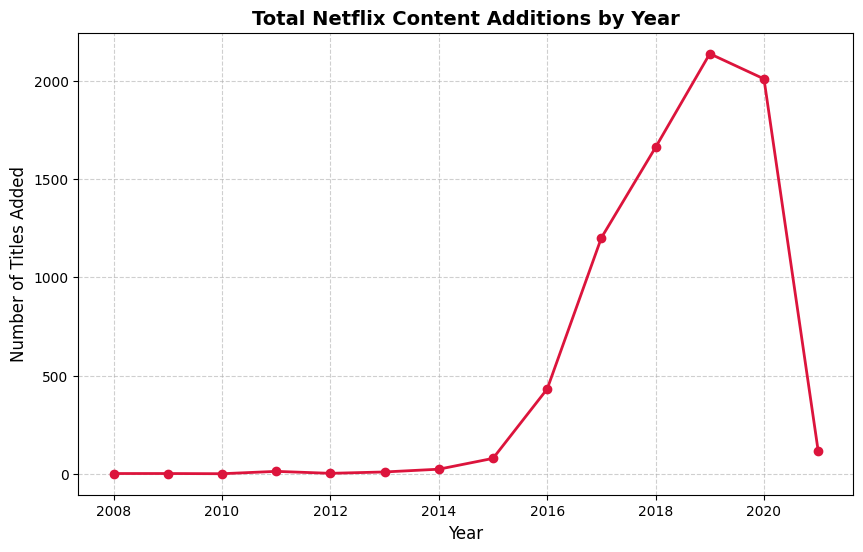

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\chili\Downloads\Telegram Desktop\Netflix Dataset (5).csv")


if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['year_added'] = df['date_added'].dt.year
elif 'Release_Date' in df.columns:
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
    df['year_added'] = df['Release_Date'].dt.year
else:
    raise KeyError("No date column found. Please check your dataset column names.")

df = df.dropna(subset=['year_added'])

titles_per_year = df['year_added'].value_counts().sort_index()


plt.figure(figsize=(10,6))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', color='crimson', linewidth=2)
plt.title("Total Netflix Content Additions by Year", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset using your path
df = pd.read_csv(r"C:\Users\chili\Downloads\Telegram Desktop\Netflix Dataset (5).csv")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Automatically detect date column (contains 'date' or 'added')
date_col = None
for col in df.columns:
    if 'date' in col.lower() or 'added' in col.lower():
        date_col = col
        break

if date_col is None:
    raise ValueError("No date column found. Please check your dataset.")

print(f"Using '{date_col}' as date column.")

# Convert detected date column to datetime
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Drop rows with missing date
df = df.dropna(subset=[date_col])

# Extract year-month
df['year_month'] = df[date_col].dt.to_period('M')




Using 'Release_Date' as date column.


In [50]:
print(df.columns)

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


Type
Documentaries                                                  334
Stand-Up Comedy                                                321
Dramas, International Movies                                   320
Comedies, Dramas, International Movies                         243
Dramas, Independent Movies, International Movies               215
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
Docuseries, Science & Nature TV, TV Action & Adventure           1
British TV Shows, Classic & Cult TV, Kids' TV                    1
Docuseries, TV Sci-Fi & Fantasy                                  1
Children & Family Movies, Dramas, Music & Musicals               1
Name: count, Length: 492, dtype: int64


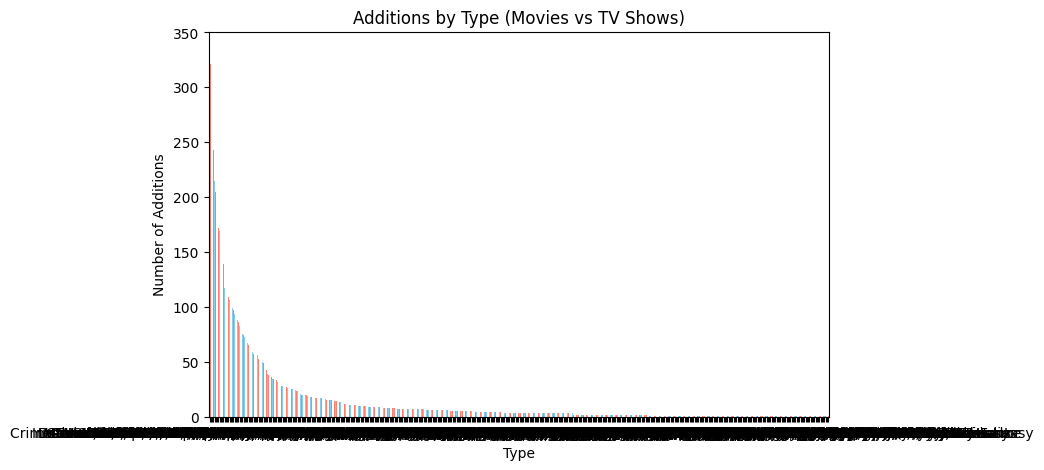

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

type_counts = df['Type'].value_counts()
print(type_counts)

plt.figure(figsize=(8,5))
type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Additions by Type (Movies vs TV Shows)')
plt.xlabel('Type')
plt.ylabel('Number of Additions')
plt.xticks(rotation=0)
plt.show()


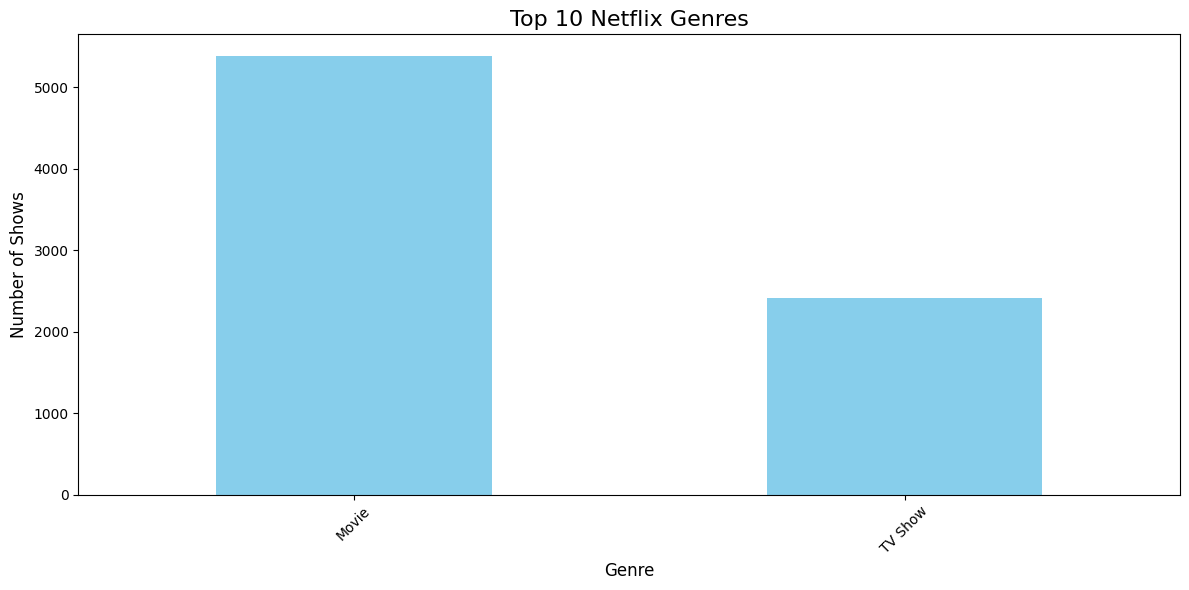

In [ ]:
genre_counts = df['Category'].value_counts().head(10)
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Netflix Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

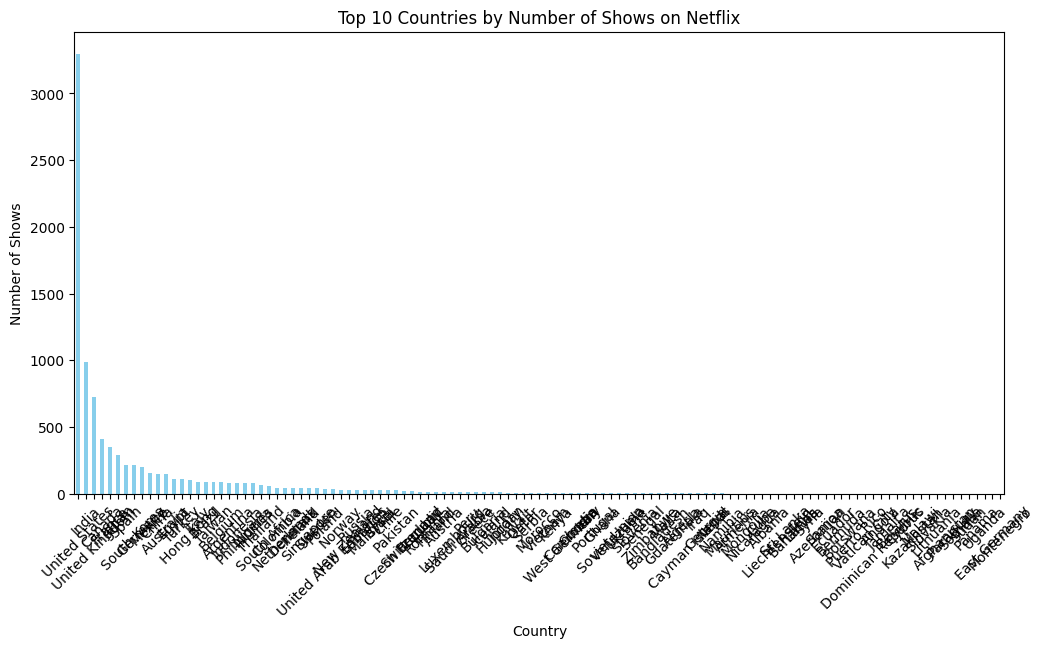

In [58]:
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

In [69]:


# Group by Category and calculate average
avg_by_category = df.groupby('Category')['Review_Rating'].mean().sort_values()

# Plot
plt.figure(figsize=(10,6))
avg_by_category.plot(kind='barh', color='skyblue')
plt.title('Average Review Rating by Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')

# Add numbers on bars
for index, value in enumerate(avg_by_category):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')

plt.show()

KeyError: 'Column not found: Review_Rating'

In [70]:
print(df.columns)

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


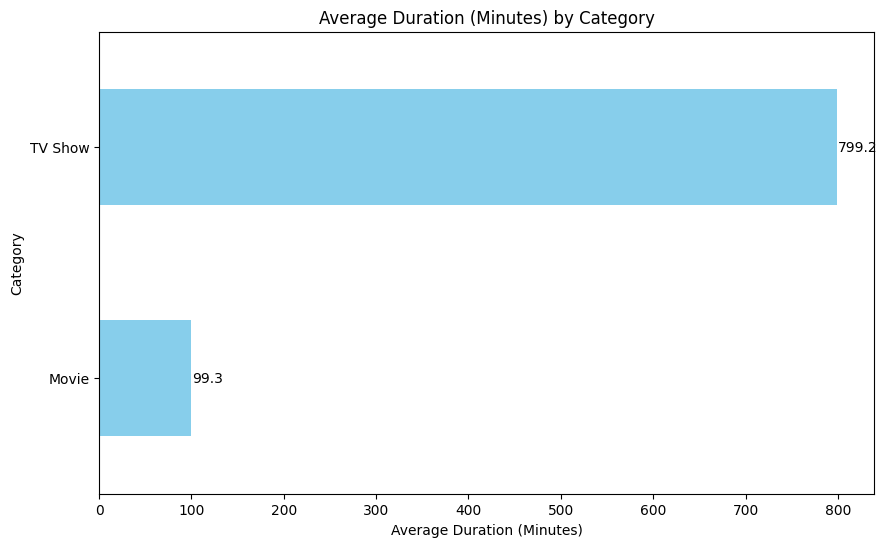

In [78]:


def extract_minutes(duration):
    if pd.isna(duration):
        return None
    duration = duration.strip()
    if 'min' in duration:
        return int(duration.replace(' min','').strip())
    # Optionally, convert TV show seasons to minutes (assuming 10 eps * 45 min each)
    elif 'Season' in duration:
        num_seasons = int(duration.split()[0])
        return num_seasons * 10 * 45
    return None


df['Duration_Min'] = df['Duration'].apply(extract_minutes)

avg_duration_category = df.groupby('Category')['Duration_Min'].mean().dropna().sort_values()

plt.figure(figsize=(10,6))
avg_duration_category.plot(kind='barh', color='skyblue')
plt.title('Average Duration (Minutes) by Category')
plt.xlabel('Average Duration (Minutes)')
plt.ylabel('Category')

for index, value in enumerate(avg_duration_category):
    plt.text(value + 1, index, f"{value:.1f}", va='center')

plt.show()



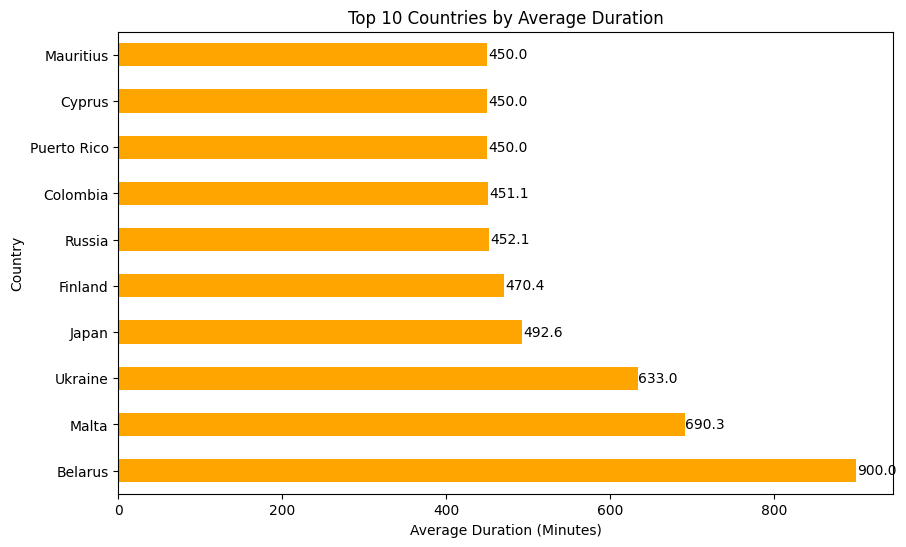

In [77]:
df['Country'] = df['Country'].fillna('Unknown')
df_expanded = df.assign(Country=df['Country'].str.split(',')).explode('Country')
df_expanded['Country'] = df_expanded['Country'].str.strip()

avg_duration_country = df_expanded.groupby('Country')['Duration_Min'].mean().dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_duration_country.plot(kind='barh', color='orange')
plt.title('Top 10 Countries by Average Duration')
plt.xlabel('Average Duration (Minutes)')
plt.ylabel('Country')

for index, value in enumerate(avg_duration_country):
    plt.text(value + 1, index, f"{value:.1f}", va='center')

plt.show()

<Axes: xlabel='Year'>

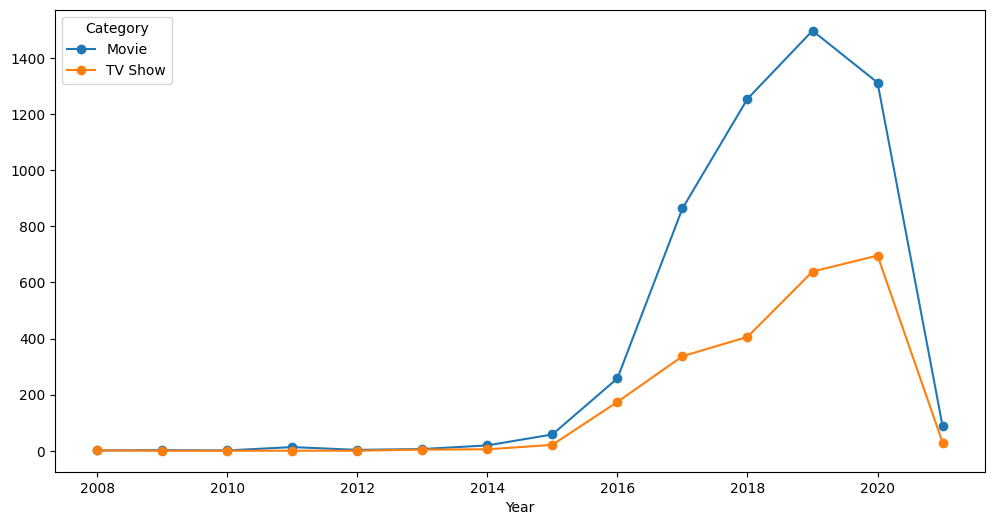

In [80]:
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
category_trend = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)
category_trend.plot(kind='line', figsize=(12,6), marker='o')


<Axes: xlabel='Country'>

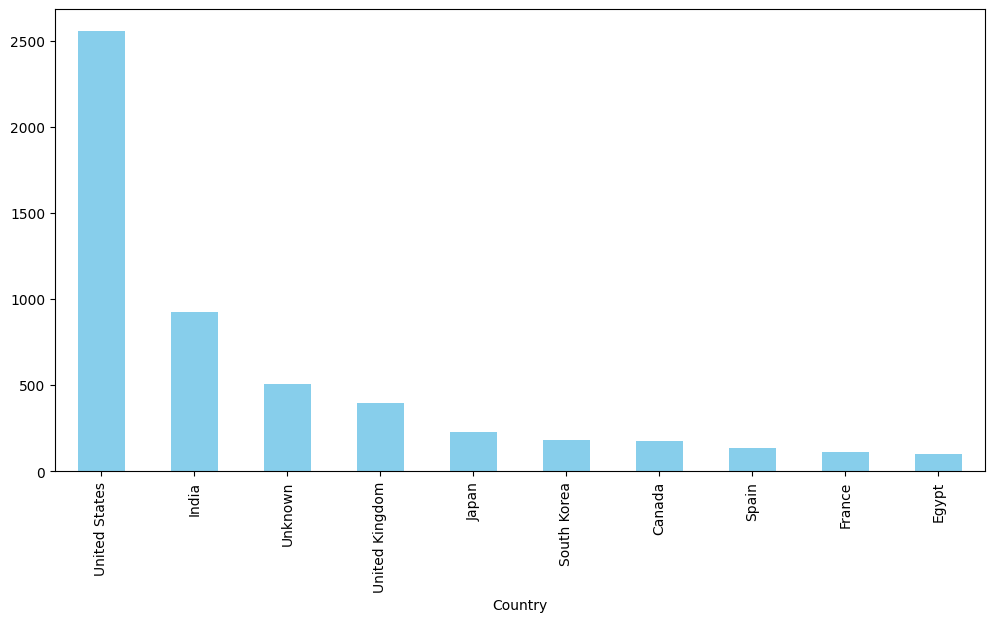

In [82]:
country_counts = df['Country'].value_counts().head(10)
country_counts.plot(kind='bar', figsize=(12,6), color='skyblue')
